In [23]:
# Convolution Network

#x[i] = {3,4,5} #non-zero for i=0,1,2
#h[i] = {2,1,0} #non-zero for i=0,1
# where i - index


In [24]:
import numpy as np

x = [3,4,5]
h = [2,1,0]

y = np.convolve(x,h)
y
# convolution - y[n] = sum x[k] * h[n-k]

array([ 6, 11, 14,  5,  0])

In [25]:
print("Compare with the following values from Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0],y[1],y[2],y[3],y[4])) 

Compare with the following values from Python: y[0] = 6 ; y[1] = 11; y[2] = 14; y[3] = 5; y[4] = 0


In [26]:
# NOTE - invert filter 'x', otherwise it's crosscorrelation
# 3 methods to apply kernel on the matrix: padding(full), 
# padding(same), without padding(vaid) 

In [27]:
x = [6,2] 
h = [1,2,5,4]

# padding
# [2,6]
#  | |
#  V V
#0 [1 2 5 4 ] 0
# 2 * 0 + 6 * 1 = 6 etc.


y = np.convolve(x,h, "full")
y

array([ 6, 14, 34, 34,  8])

In [28]:
# padding atht the end. same simensionality as h
# [2,6]
#  | |
#  V V
# [1 2 5 4 ] 0
# 2 * 4 + 6 * 0 = 6 etc.

y = np.convolve(x,h, "same") # it is same as zero padding, but withgenerates same 
y

array([ 6, 14, 34, 34])

In [29]:
# no padding
# [2,6]
#  | |
#  V V
# [1 2 5 4 ] 
# 2 * 1 + 6 * 2 = 14 etc.

y = np.convolve(x,h, "valid") #we will understand why we used the argument valid in the next example
y

array([14, 34, 34])

In [30]:
# 2D convolution operation
# I' = sum{u,v} I(x - u, y - v) g(u, v)

from scipy import signal as sg

I = [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g = [[-1,1]]  #compares brightness of neighbouring pixels. edge detection
# g is also flipped in use, because convolution
# why the double bracketing ?

print ('Without zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print ('With zero padding \n')
print (sg.convolve( I, g))
# puts a 0 column in front

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [31]:
# more difficult case with h = [[-1 1], [2 3]]
g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


In [32]:
# Coding with TensorFlow

# suppose we have a 10x10 image and 3x3 filter
# SAME mode -> output same dim as input
# VALID mode -> output dim = dim(input) - dim(kernel) +1

import tensorflow as tf

# Buyilding graph

input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))
op = tf.nn.conv2d(input, filter, strides = [1,1,1,1], padding ='VALID')
op2 = tf.nn.conv2d(input, filter, strides = [1,1,1,1], padding ='SAME')

# Init and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ 0.28821218]
   [-0.30956745]
   [-0.67739195]
   [-0.58447909]
   [-0.19310965]
   [-0.65750235]
   [ 0.38937658]
   [ 1.64721441]
   [-2.15479803]
   [-1.11562824]]

  [[ 0.98749113]
   [ 0.34678498]
   [-0.64276111]
   [ 0.82011205]
   [-1.10788238]
   [-0.53641689]
   [ 0.61483866]
   [-0.52806908]
   [-0.1477118 ]
   [-0.07705496]]

  [[-1.83326685]
   [ 1.02539003]
   [-0.76901203]
   [ 1.09092474]
   [ 0.7555064 ]
   [-0.11610645]
   [ 0.79425293]
   [-0.08767635]
   [ 0.19353367]
   [ 0.71681613]]

  [[ 0.94643223]
   [-1.58684647]
   [ 0.94976336]
   [ 1.97954297]
   [-0.06744568]
   [ 1.65956414]
   [-1.02467883]
   [-1.17036402]
   [-0.15750252]
   [ 0.4915925 ]]

  [[ 0.44538155]
   [ 1.45656562]
   [-0.61200476]
   [ 0.72383457]
   [-1.17068756]
   [ 0.19902337]
   [-1.16531551]
   [-0.09436131]
   [-0.03577381]
   [-0.01535317]]

  [[-1.20648611]
   [ 0.00347022]
   [-0.20492041]
   [-0.49103308]
   [ 0.50545382]
   [-0.59083587]
   [ 1.00431883]
   [ 1.781734

In [33]:
# Convolution applied on images

In [36]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image


In [72]:
#raw= input() # You can put the .jpg here
# or leave it blank to type later

#im1.save(house1.jpg)
#im = Image.open(raw)  # type here your image's name
#shite broke ha!

# use this instead:
im = Image.open('bird.jpg')

In [66]:
# uses the ITU-R 601-2 Luma transform (there are several 
# ways to convert an image to grey scale)

image_gr = im.convert("L")    
print("\n Original type: %r \n\n" % image_gr)


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x27C36E21240> 




In [67]:
# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

After conversion to numerical representation: 

 array([[ 64,  71,  64, ...,  49,  47,  48],
       [ 68,  71,  63, ...,  53,  52,  51],
       [ 65,  69,  65, ...,  54,  50,  55],
       ..., 
       [ 21,  23,  22, ..., 184, 170, 154],
       [ 17,  20,  26, ..., 179, 165, 152],
       [ 26,  22,  21, ..., 170, 159, 148]], dtype=uint8)



 Input image converted to gray scale: 



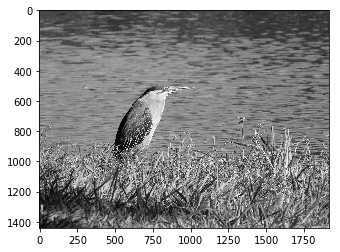

In [68]:
### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [69]:
# Edge detection kernel
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 
# change the '-4' for more or less contrast
# a cNN automatically varies the kernel

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')


GRADIENT MAGNITUDE - Feature map


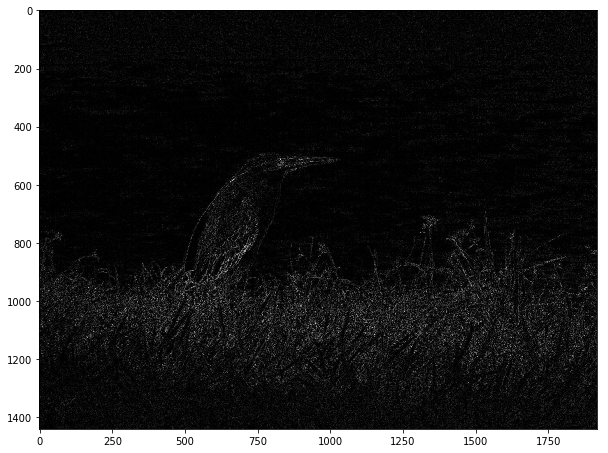

In [70]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [71]:
# Netowrks usually normalise pixel values between 0 and 1
type(grad)
grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255


In [ ]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

In [39]:
input()

TypeError: 'Variable' object is not callable